ML - Project - Phase 1
====
- Ahmed Soliman 201802284
- Abhygian Kishor
- Mohammed Arif

#- Introduction
=======

# Motivation

Customers cancel hotel reservations (or simply don't show up) due to a variety of reasons such as scheduling conflicts, change of plans, etc. Knowing if a customer will honor a reservation is hard and with the advent of online reservations for hotels, prediciting this behaivour has become an even more difficult task. Reservation cancellation leads to unfilled rooms which means hotels lose out on revenue.

Analysing the resevation cancellation dataset is crucial step in understanding and making sense of the large amount of data to efficiently predict reservation cancellations. Predicting this customer behaviour will provide hotels several benefits such as better revenue optimization, increased customer staisfaction, and accurate forecasting of demand.

Objectives
====
1 - By producing insightful summary statistics and visualization we aim to uncover patterns and insights on some of the reasons why customers may cancel.

2 - We also aim to investigate relations in different attributes of the dataset to gain a deeper understanding of the data.

3 - We aim to set expectations for future improvements and developments in understanding customer behaviour through establishing a baseline performance by training intial models such as Decision Trees, Random Forest, K-Nearest Neighbours and Logistic Regression.


#- Implementations
=======

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn import preprocessing
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
np.random.seed(1)

In [56]:
train = pd.read_csv('./playground-series-s3e7/train.csv').drop(columns='id')
test = pd.read_csv('./playground-series-s3e7/test.csv').drop(columns='id')
train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,3,0,0,4,0,0,1,160,2018,12,30,1,0,0,0,140.00,2,1
42096,2,0,0,3,0,0,0,34,2017,9,23,0,0,0,0,224.67,0,0
42097,2,0,0,2,2,0,0,292,2018,7,21,0,0,0,0,96.00,0,0
42098,1,0,0,3,0,0,0,5,2018,11,9,0,0,0,0,120.00,0,0


Ahmed
====


Data statistics
====


In [6]:
#Using Python statistics Module: Mathematical statistics functions in Python
from statistics import *
import pandas as pd
data = train['booking_status']
# print(sorted(data))
print("Min", data.min())
print("Max", data.max())
print("mean",mean(data))
print("median",median(data)) 
print("mode",mode(data)) #Single mode (most common value) of discrete or nominal data.
print("multimode",multimode(data)) #List of modes (most common values) of discrete or nominal data.
print("quantiles",quantiles(data)) #Divide data into intervals with equal probability
print("variance",variance(data)) #sample variance of data
print("std",stdev(data))  #sample standard deviation


train.describe(include='all')

Min 0
Max 1
mean 0.3920190023752969
median 0.0
mode 0
multimode [0]
quantiles [0.0, 0.0, 1.0]
variance 0.23834576557158363
std 0.4882066832516569


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019
std,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


Data visualization - matplotlib
====


1- boxplots
====


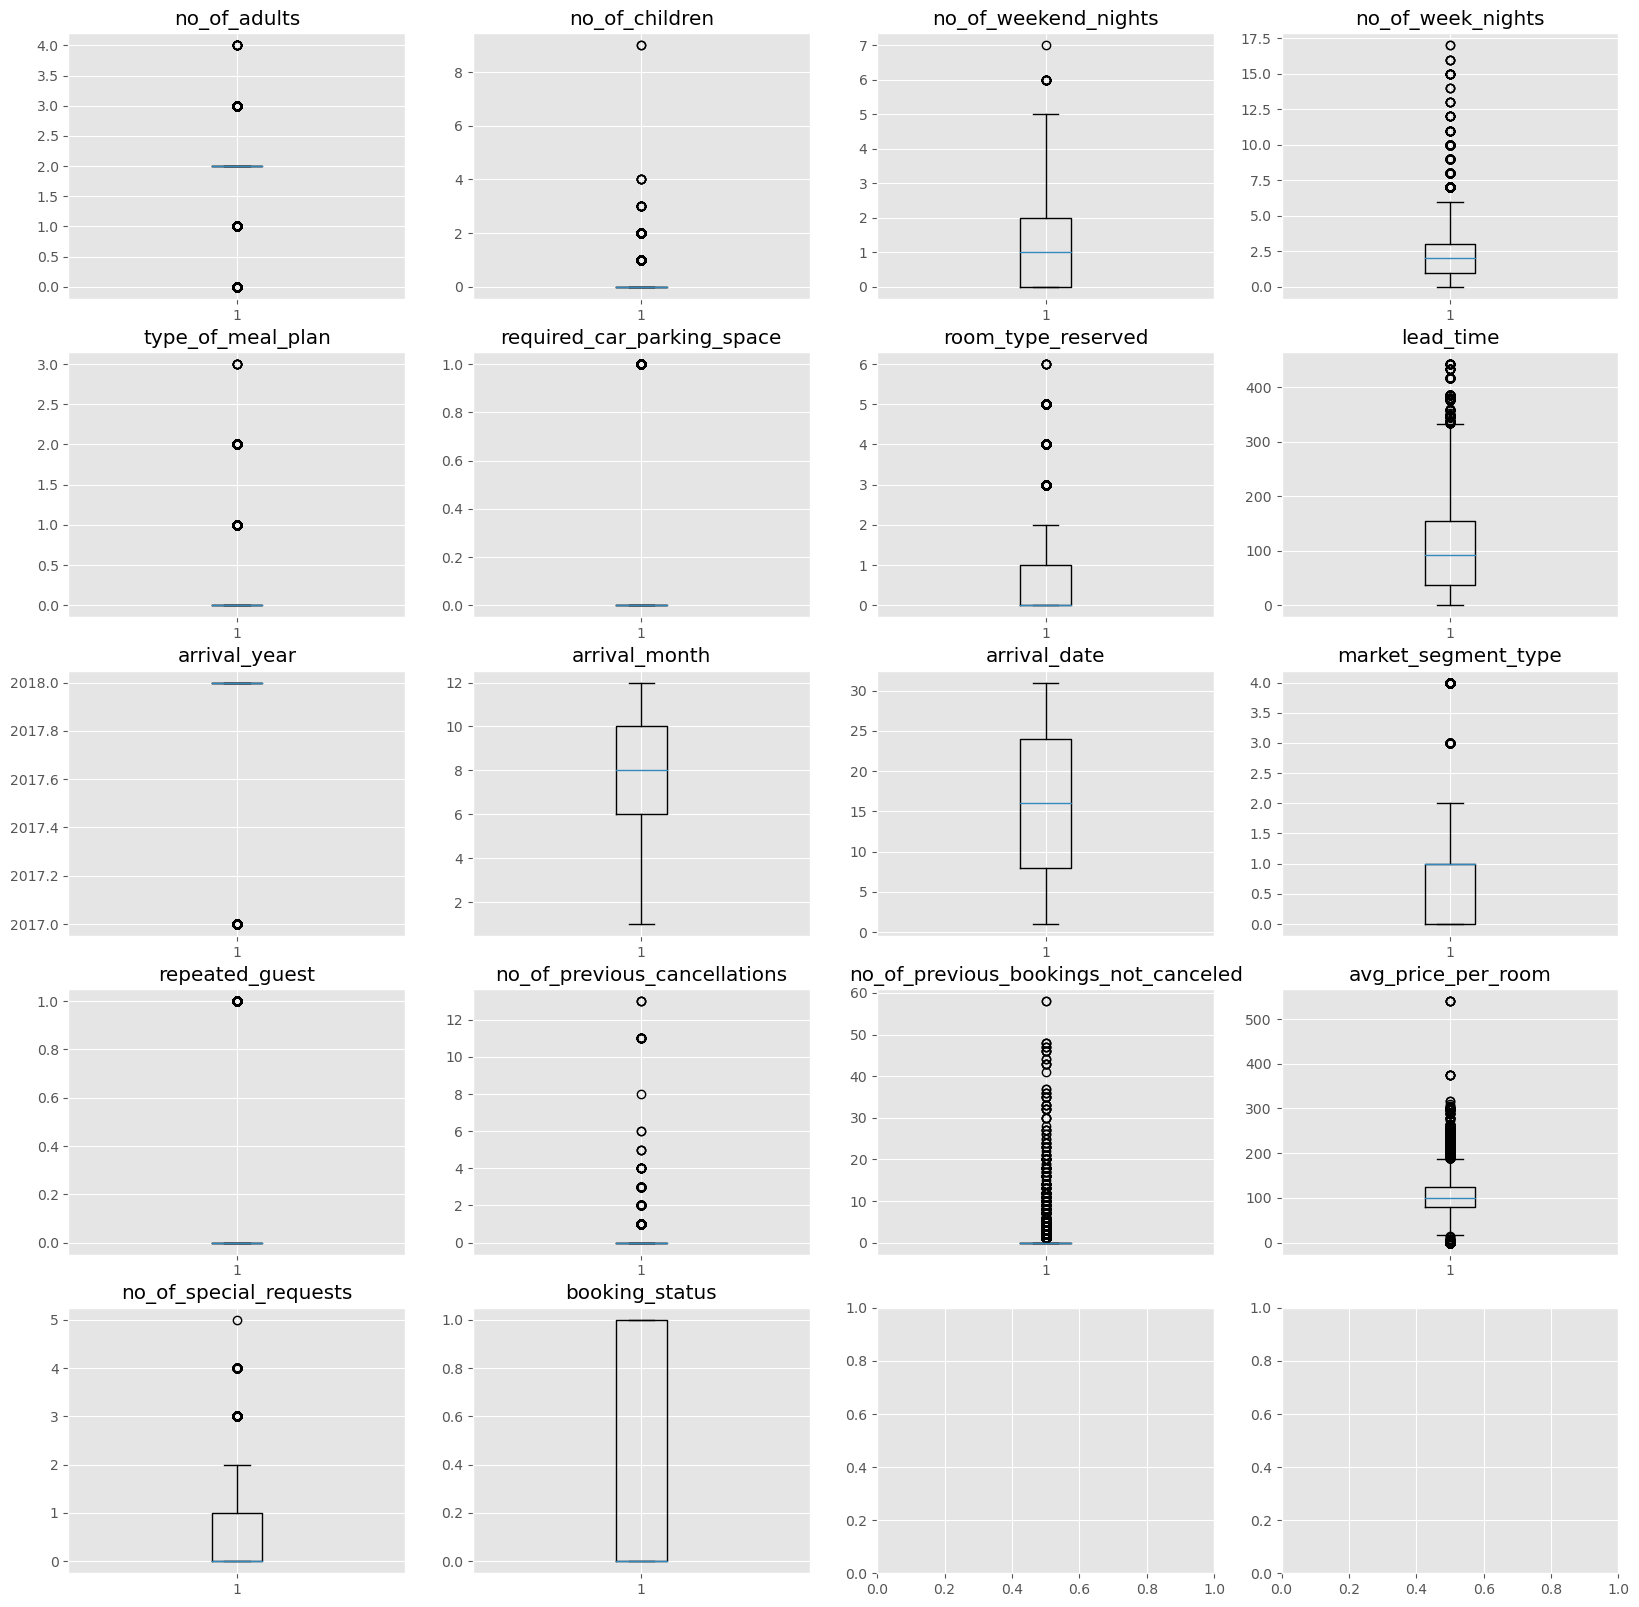

In [7]:
# calculate the number of rows based on the number of columns and 3 plots per row
nrows = int(np.ceil(len(train.columns)/4))

# create the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(20, nrows*4))

# plot the boxplots
for i, column in enumerate(train.columns):
    row = i // 4
    col = i % 4
    axes[row, col].boxplot(train[column])
    axes[row, col].set_title(column)
# plt.tight_layout()
plt.show()

2- histograms
====


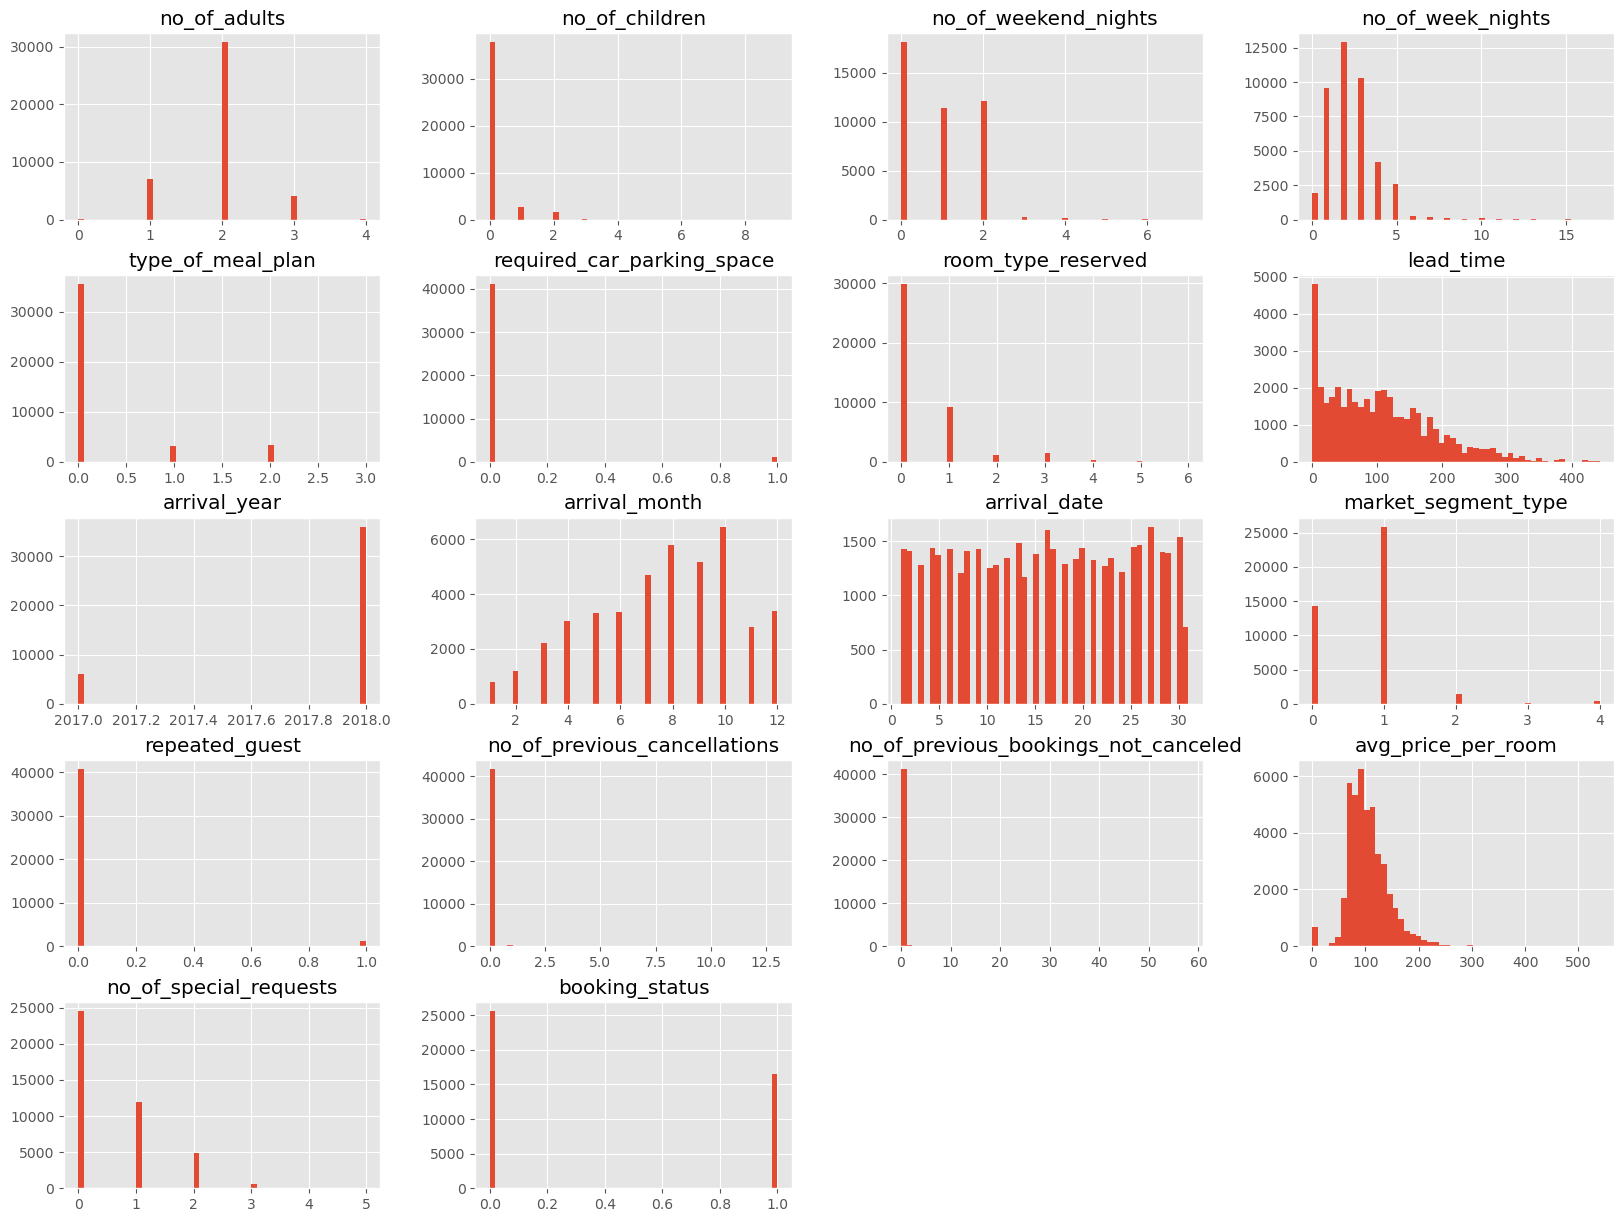

In [8]:
# plot the histogram
train.hist(bins=50, figsize=(20, 15))
plt.show()

3- stem
====


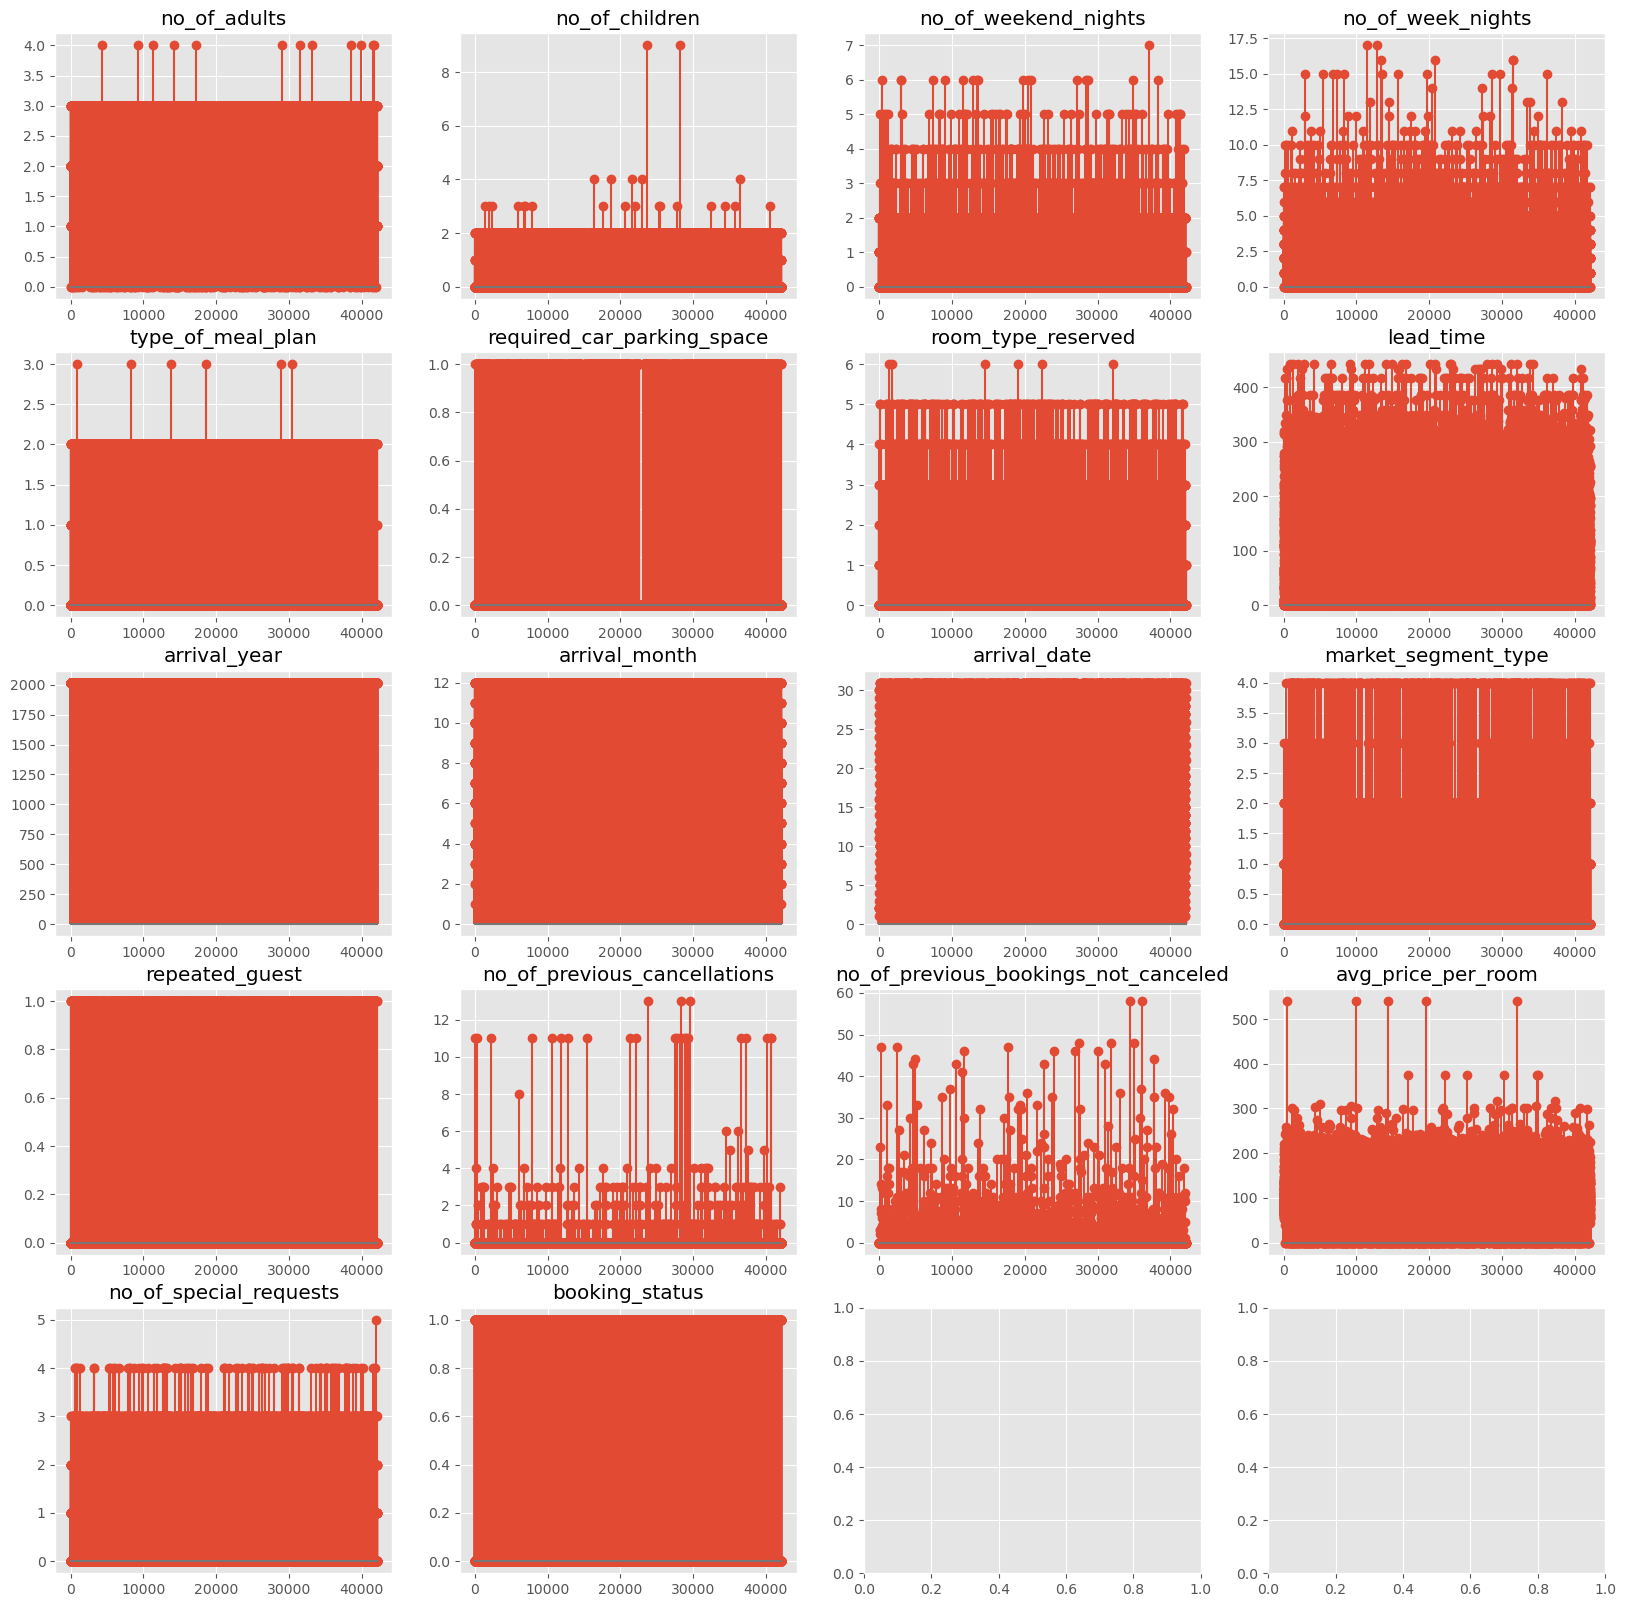

In [9]:
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(20, nrows*4))
for i, column in enumerate(train.columns):
    row = i // 4
    col = i % 4
    axes[row, col].stem(train[column])
#     axes[row, col].margins(0.05)
    axes[row, col].set_title(column)
plt.show()

Data visualization - seaborn
====

1- boxplots
====


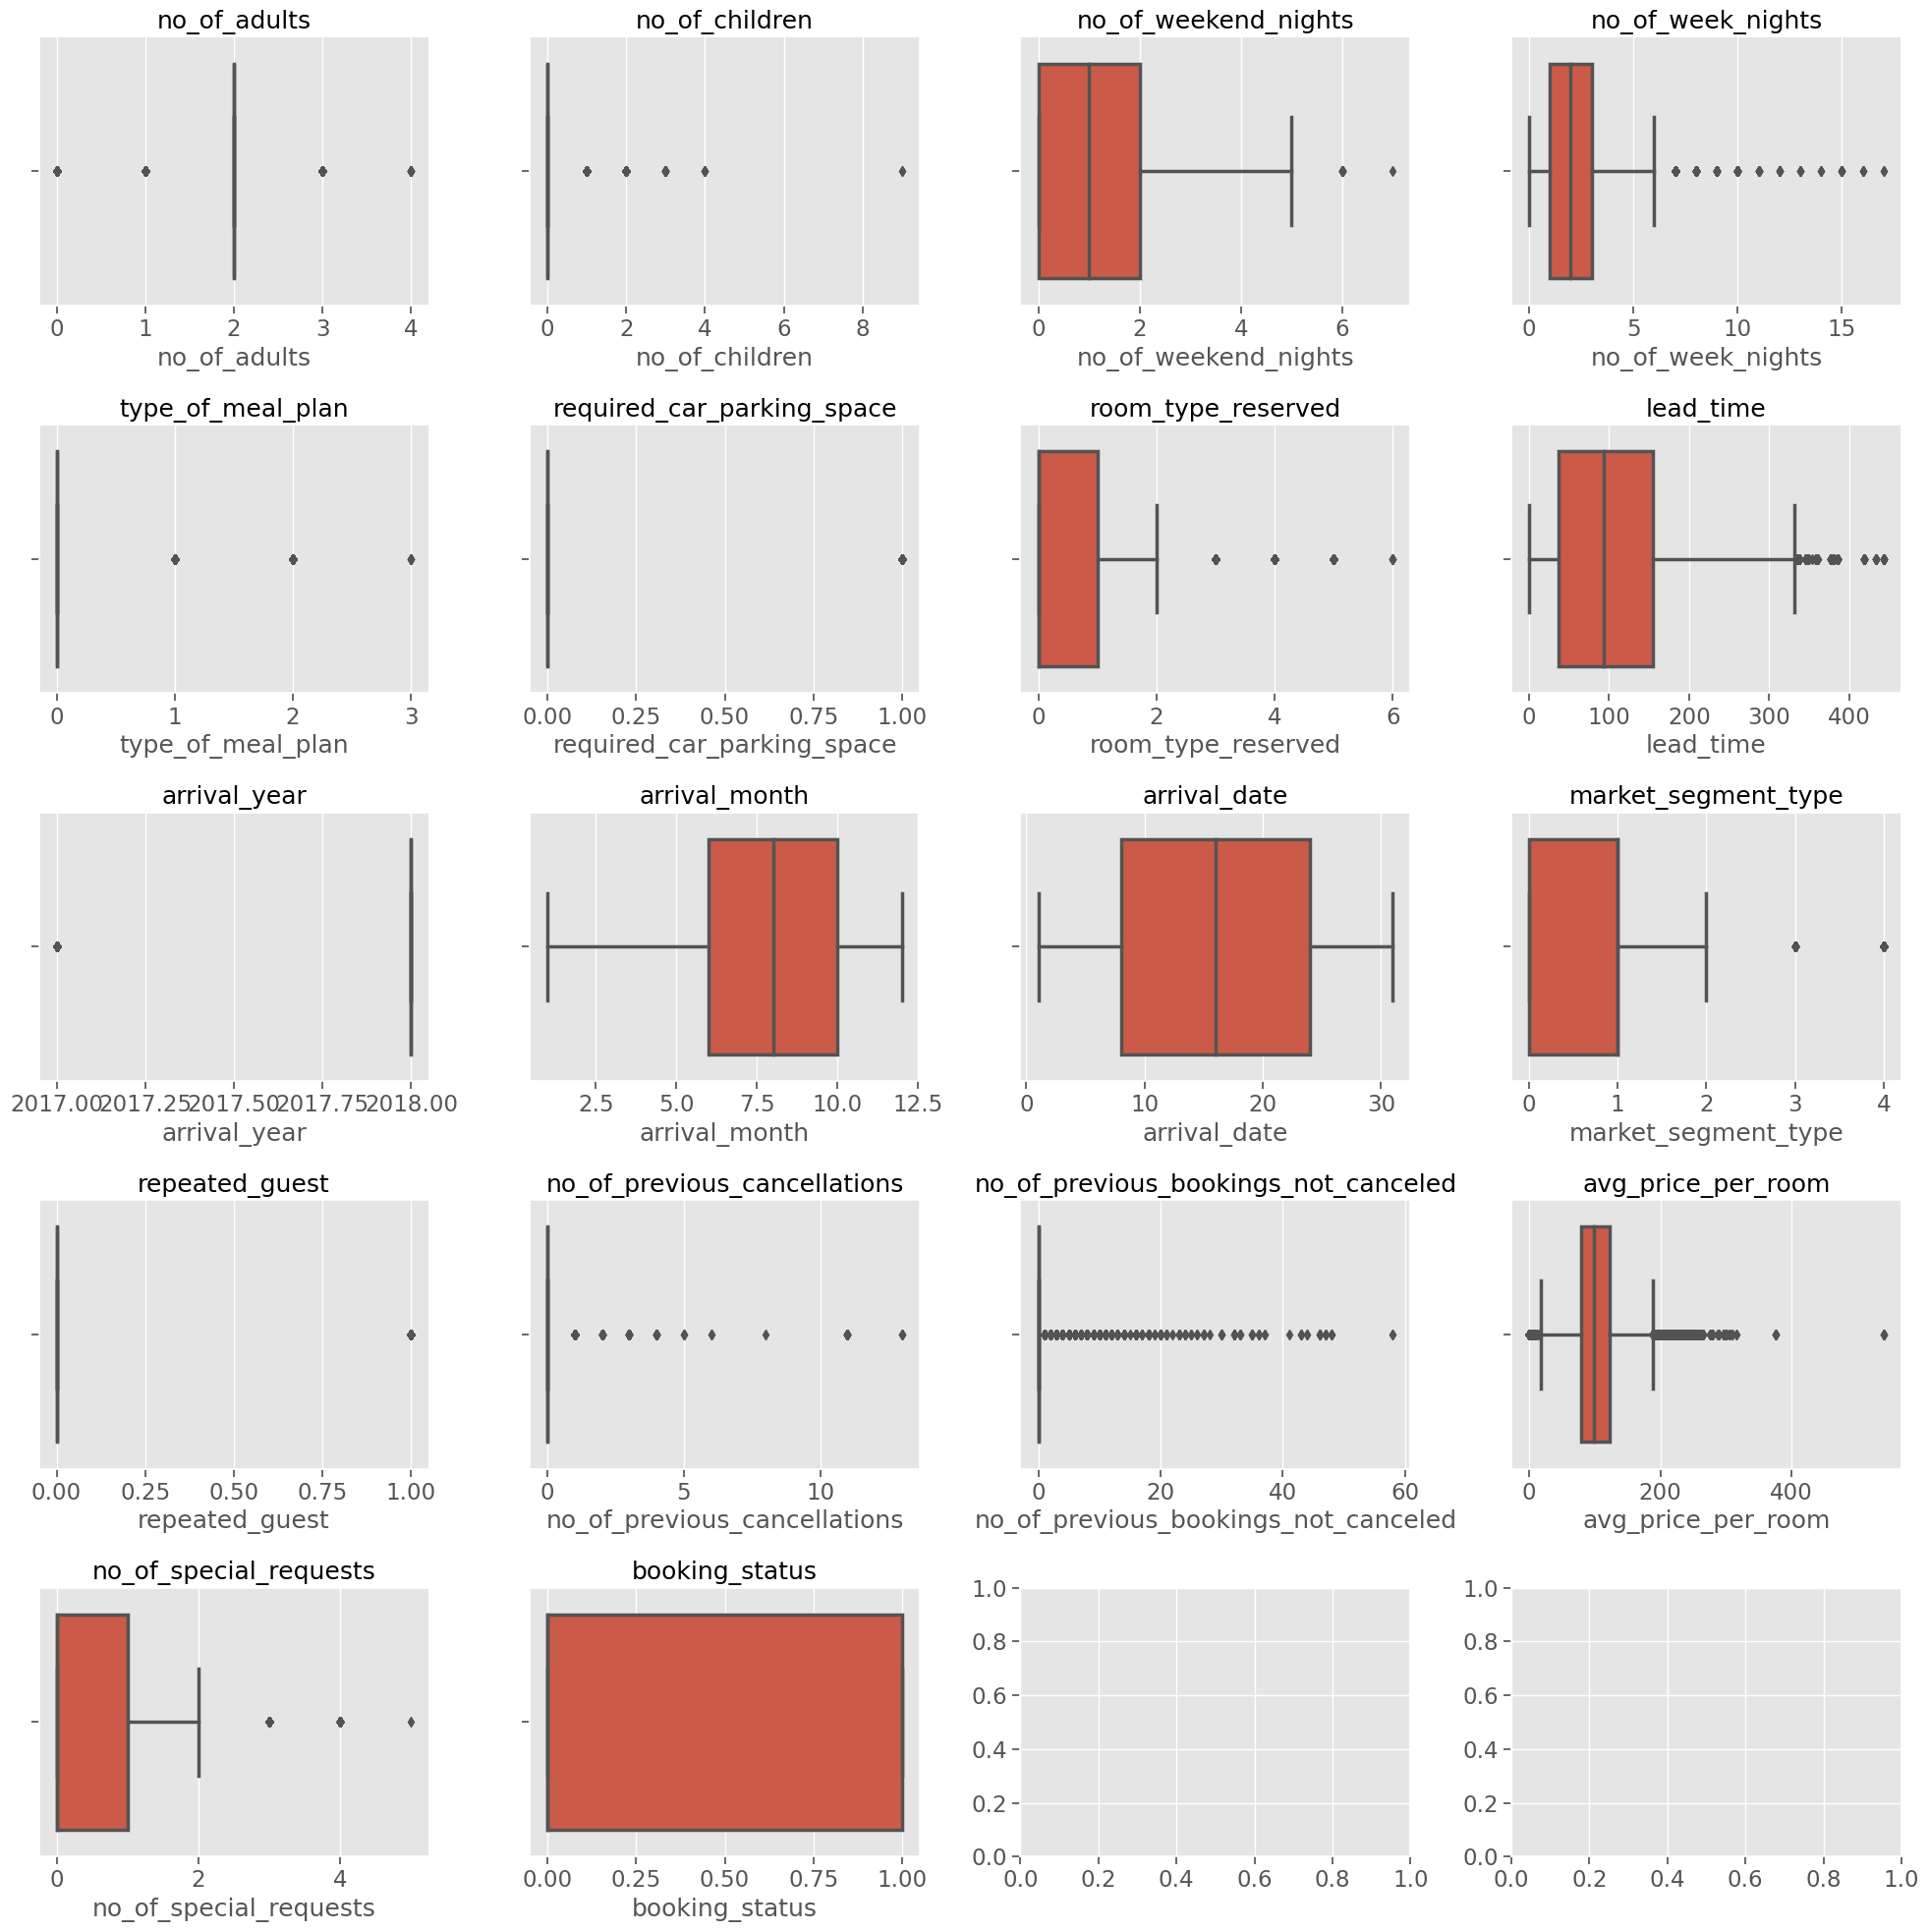

In [10]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# calculate the number of rows based on the number of columns and 3 plots per row
nrows = int(np.ceil(len(train.columns)/4))

# create the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(20, nrows*4))

# plot the boxplots
for i, column in enumerate(train.columns):
    row = i // 4
    col = i % 4
    sns.boxplot(data=train, x=column, ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

2- histograms
====


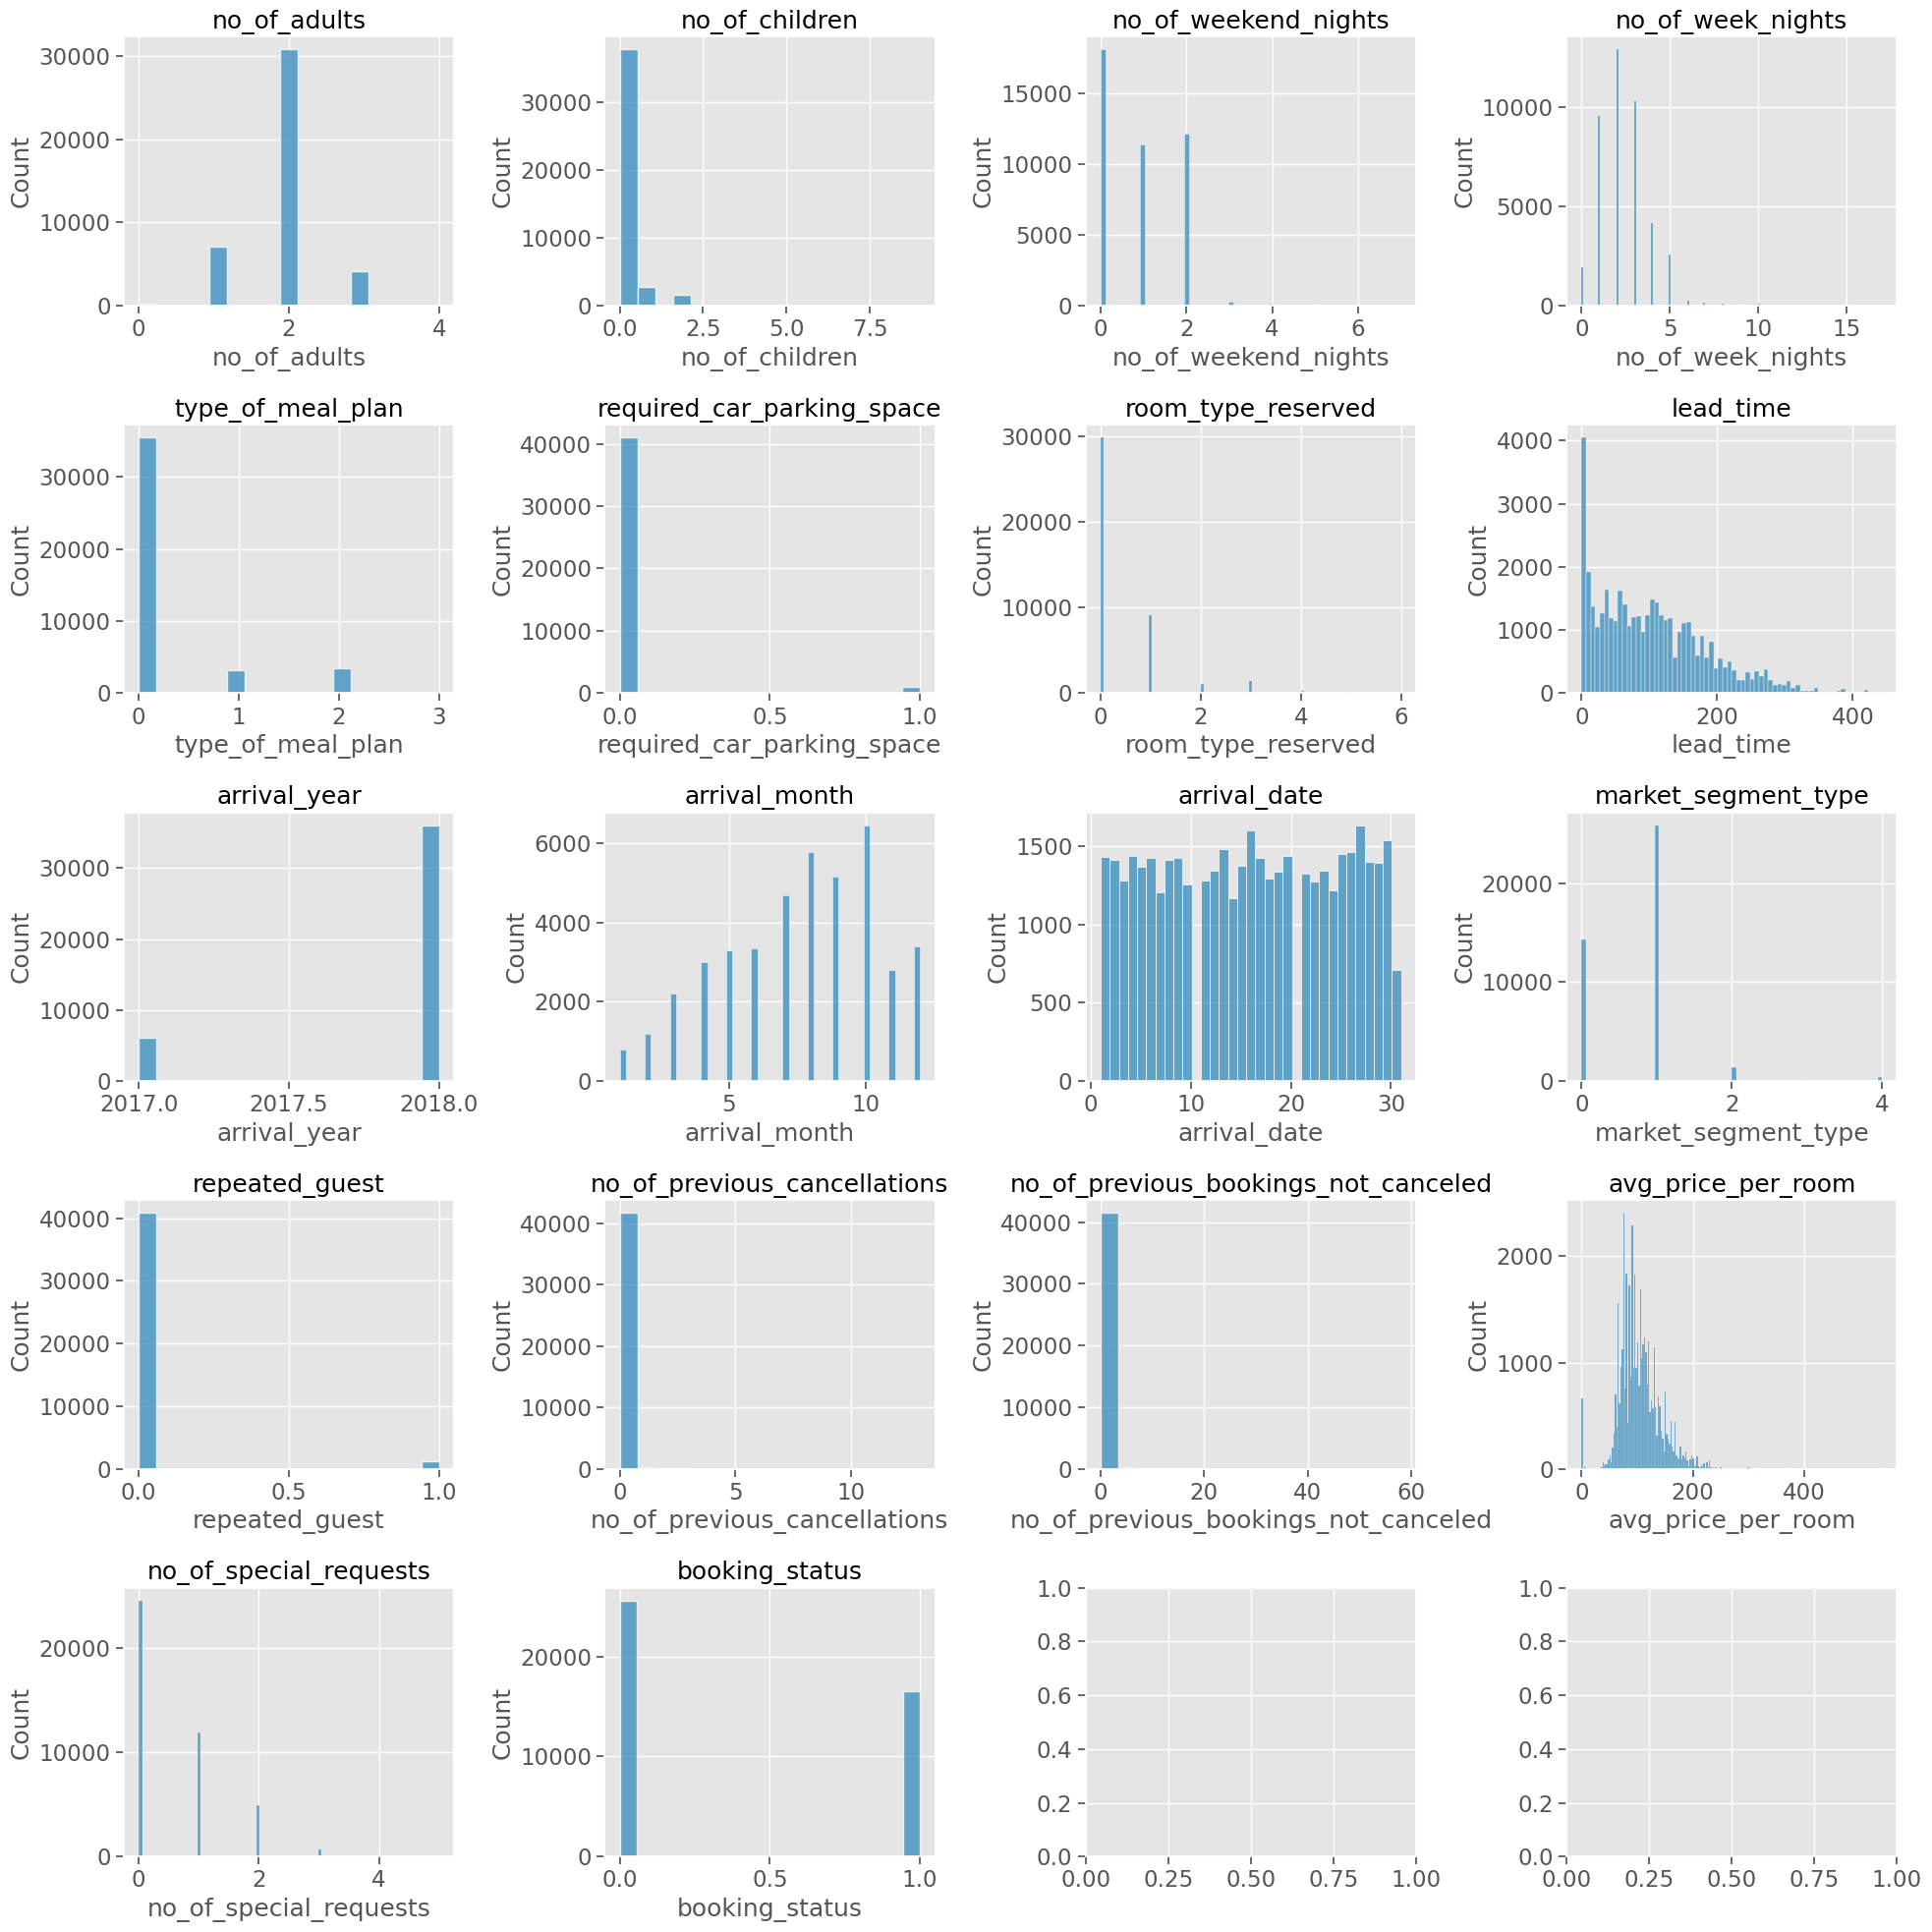

In [11]:
# plot the histogram
# train.hist(bins=50, figsize=(20, 15))

# plot histograms for each column separately

# calculate the number of rows based on the number of columns and 3 plots per row
nrows = int(np.ceil(len(train.columns)/4))

# create the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(20, nrows*4))

# plot the boxplots
for i, column in enumerate(train.columns):
    row = i // 4
    col = i % 4
    sns.histplot(data=train, x=column, ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

3- stem
====


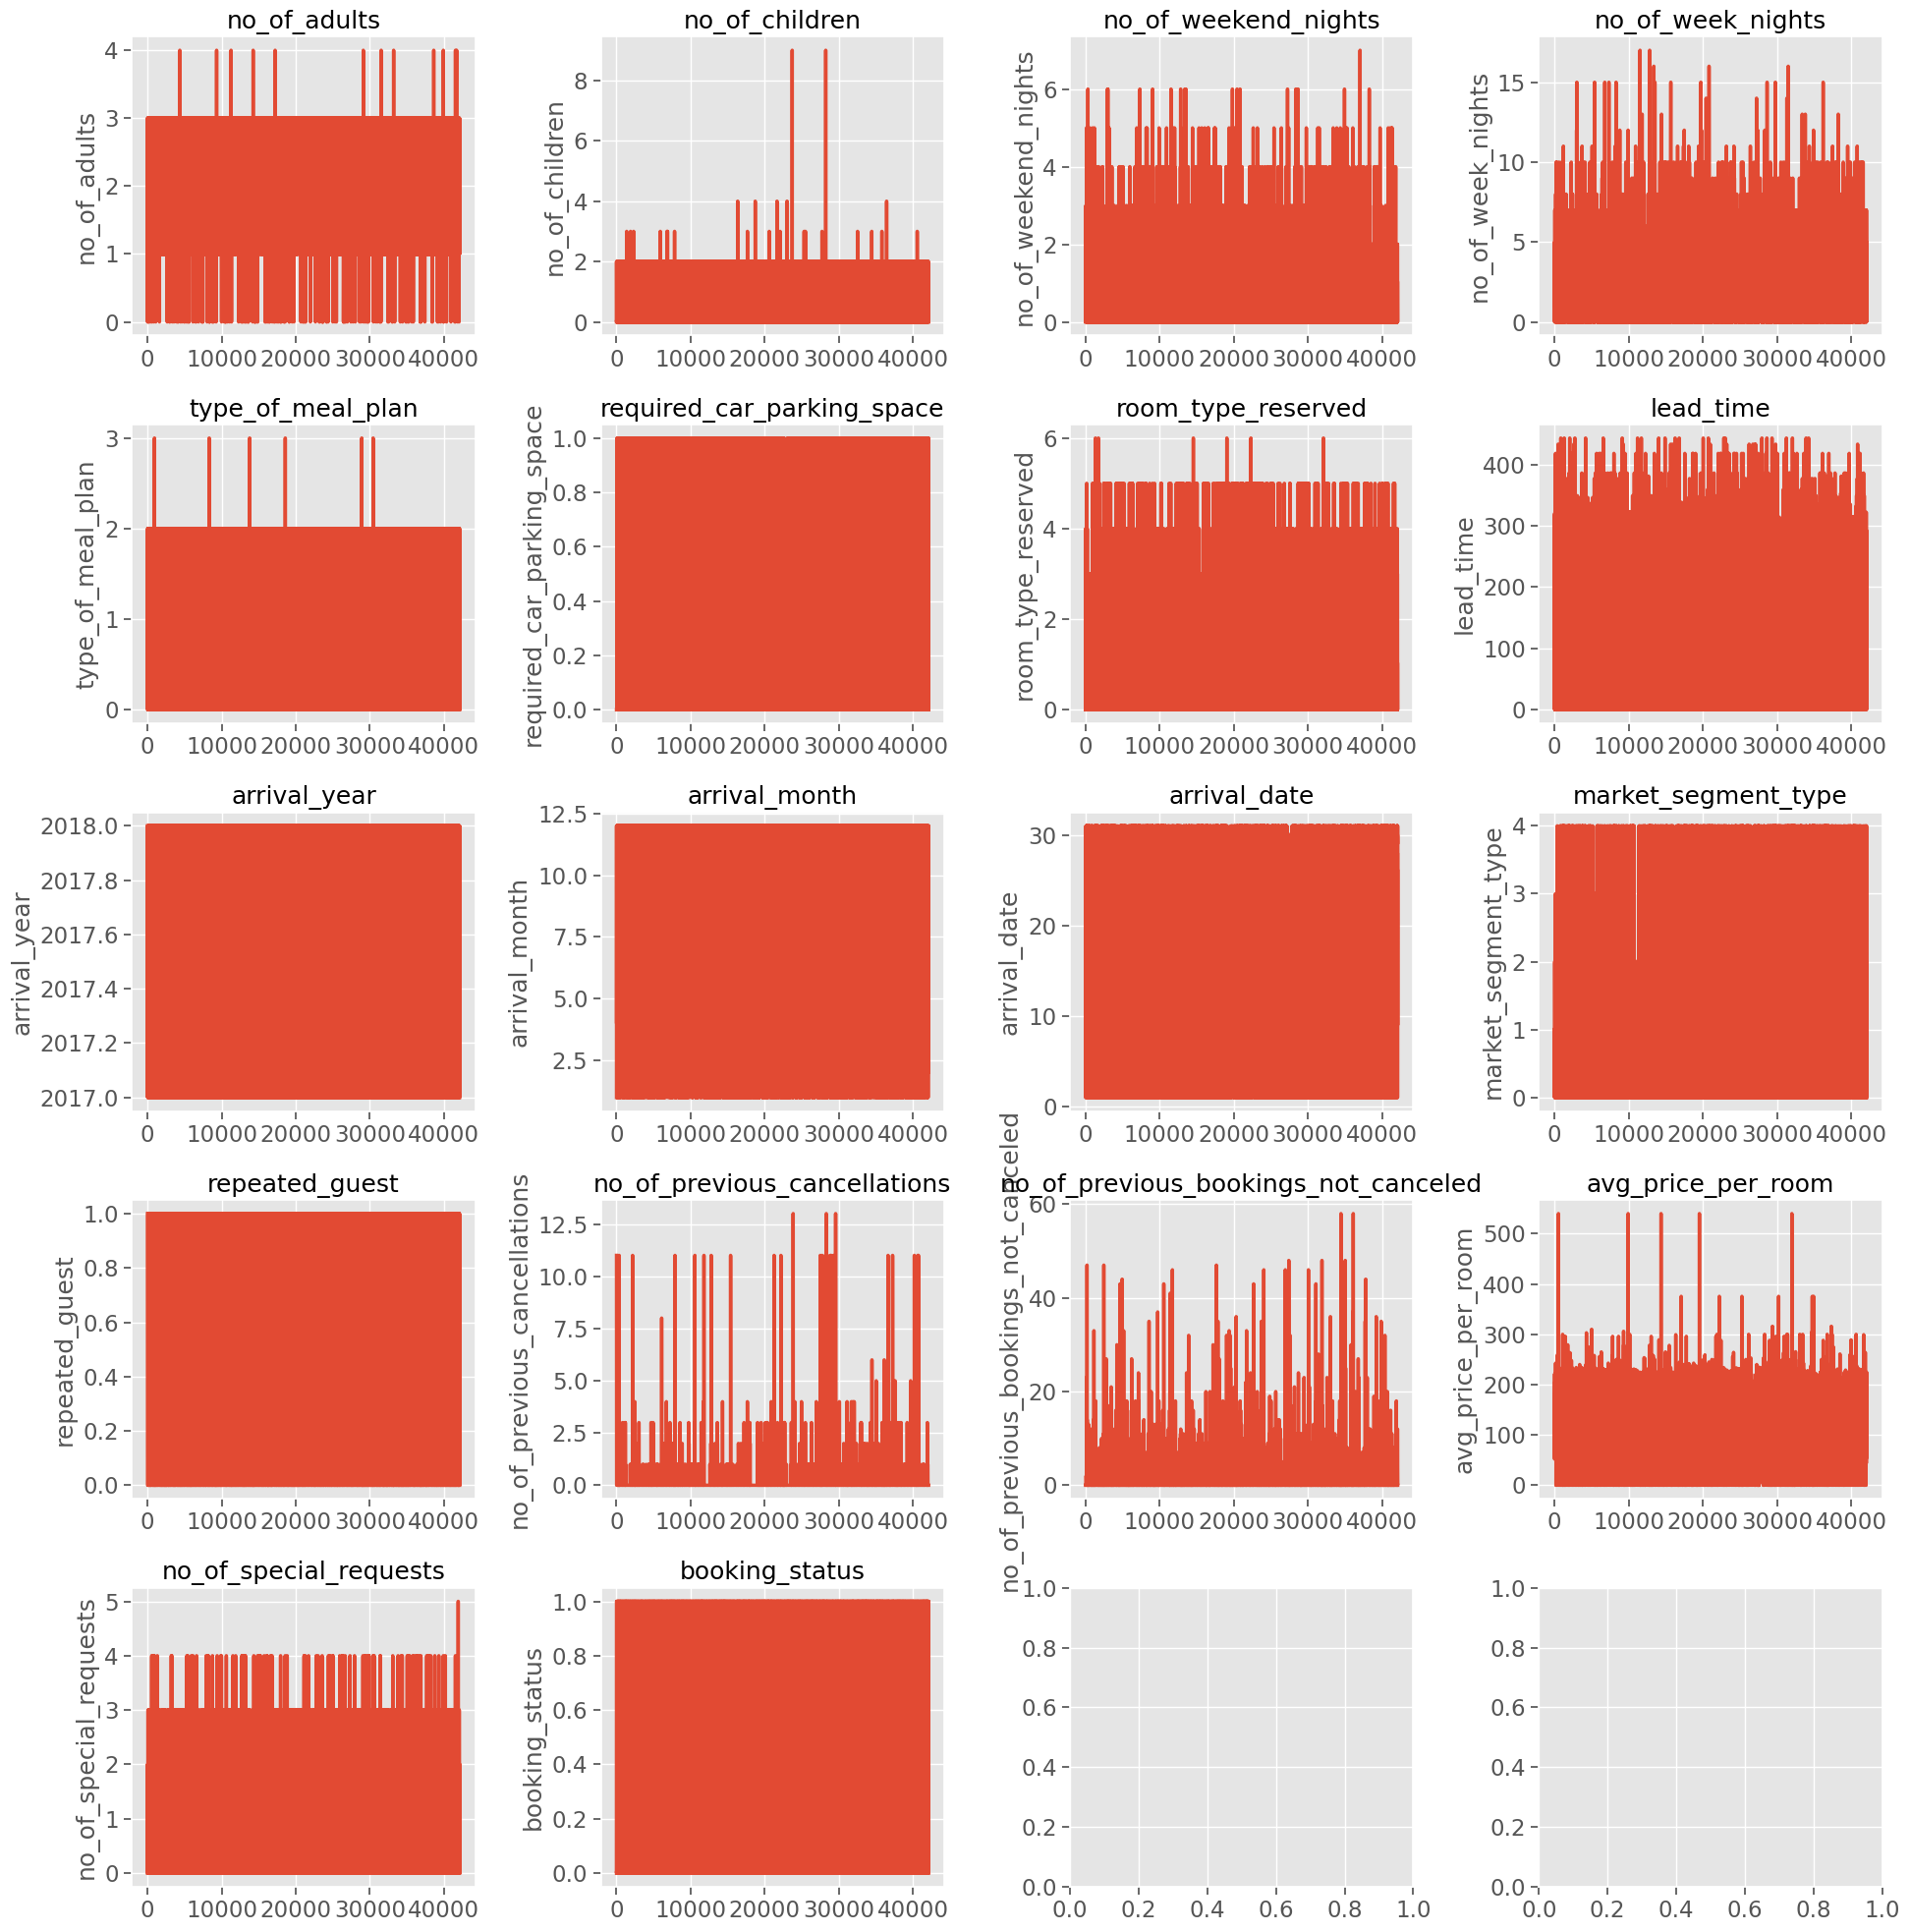

In [12]:
# calculate the number of rows based on the number of columns and 3 plots per row
nrows = int(np.ceil(len(train.columns)/4))

# create the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(20, nrows*4))

# plot the line plots
for i, column in enumerate(train.columns):
    row = i // 4
    col = i % 4
    sns.lineplot(data=train, x=train.index, y=column, ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

Kishor
====


### Removing duplicates

In [160]:
train_copy = train.copy()
print(train_copy.shape)

(42100, 18)


In [161]:
train_dups = train_copy.drop(columns = 'booking_status').duplicated().sum()
print(f'Number of duplicates in training dataset: {train_dups}')

Number of duplicates in training dataset: 562


In [162]:
train_copy = train_copy.drop_duplicates(subset = train.columns[:-1])
test_copy = test_copy.drop_duplicates()

In [163]:
print(train_copy.shape)

(41538, 18)


### Removing anomalies

These are the anomalies we noticed:
1. Anomalous dates, such as 29th February
2. Average price per room = 0

In [164]:
# Removing entries where average price of room is 0. This is not possible.
train_copy = train_copy.loc[train_copy['avg_price_per_room'] != 0]
train_copy.shape

(40899, 18)

In [165]:
# Removing anomolous dates
train_copy.rename(columns = {'arrival_year': 'year', 'arrival_month': 'month', 'arrival_date': 'day'}, inplace = True)
train_copy['true_date'] = pd.to_datetime(train_copy[['year', 'month', 'day']], errors = 'coerce')
train_copy = train_copy.dropna()
train_copy.shape

(40849, 19)


# Arif

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_original = train.iloc[:,:-1]
y_original = train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.2, random_state=42)
print("Shapes:")
print(" X_train: ",X_train.shape)
print(" X_test: ",X_test.shape)
print(" y_train: ",y_train.shape)
print(" y_test: ",y_test.shape)

## Decision Trees

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
print("Training Accuracy:", tree_clf.score(X_train, y_train))

In [ ]:
#plt.figure(figsize=(10,8))
#plot_tree(tree_clf, filled=True)
#plt.title("Decision tree trained on all attributes")
#plt.show()

#Takes too long 

**Decsion tree predictions on X_test**

In [ ]:
y_pred = tree_clf.predict(X_test)
print("Predicted Labels:", y_pred[:30])
print("True Labels:     ", y_test.to_numpy()[:30])
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

**Confusion Matrix for Decision tree classifier**

In [ ]:
matrix = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=tree_clf.classes_)
disp.plot()
plt.show()

**Cross Validation**

In [ ]:
scores = cross_val_score(tree_clf, X_train, y_train, cv=50)
print(scores)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

**Using GridSearchCV to find hyperparameters**

In [ ]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20, 40],
    'min_samples_leaf': [1, 2, 5, 10],
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params,
                              cv=3)

grid_search_cv.fit(X_train, y_train)

y_pred = grid_search_cv.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

tree_clf = grid_search_cv.best_estimator_
print("Criterion:         ", tree_clf.criterion)
print("Min Samples Leaf:  ", tree_clf.min_samples_leaf)
print("Depth:             ", tree_clf.max_depth)
print("Min Samples Split: ", tree_clf.min_samples_split)

In [ ]:
plt.figure(figsize=(10,8))
plot_tree(tree_clf, filled=True)
plt.title("Decision tree trained on all attributes")
plt.show()

**Random Forest Classifier**

In [ ]:
randomForest_clf = RandomForestClassifier(n_estimators=200, random_state=42,max_samples=5000)
randomForest_clf.fit(X_train, y_train)
print("Accuracy:",randomForest_clf.score(X_test, y_test))

## K-Nearest Neighbours

In [ ]:
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
scores = cross_val_score(model, X_train, y_train, cv=50)
print(scores)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train)


lin_reg = LogisticRegression(max_iter=1000)
lin_reg.fit(X_scaled, y_train)
print(lin_reg.intercept_)
print(lin_reg.coef_)
y_pred= lin_reg.predict(X_test)
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Testing Precision:", metrics.precision_score(y_test, y_pred))
print("Testing Recall:", metrics.recall_score(y_test, y_pred))
print("Testing f1 Score:", metrics.f1_score(y_test, y_pred))


Conclusion
====

In conclusion, our data analysis project has been successful in achieving its objectives. We have produced insightful summary statistics and visualizations that have helped us to uncover patterns and insights in the data. Through the removal of outliers and handling of missing values and duplicates, we have developed a cleaner and more accurate dataset that can be used for further analysis. Investigation of relationships between different attributes has provided us with a deeper understanding of the data and the factors that influence it. We have identified correlations between attributes that can be used to make predictions and inform decision-making processes. Finally, by establishing a baseline performance through initial model training, we have set expectations for future improvements and developments in the data analysis process. Our analysis has provided us with valuable insights that can be used to make informed decisions and improve business processes. Overall, we are confident that our data analysis project has been a success and has provided a solid foundation for future analysis and improvement.